In [1]:
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib inline

import imageio

from glob import glob
import numpy as np
from tqdm import tqdm

from PoisDenoiser.utils import get_poisson_pair_by_maxval
from PoisDenoiser.utils import show_images as show
from skimage.transform import resize

import torch as th

def RandomCrop(img, size):
    rand_y = np.random.randint(0, img.shape[0]-size)
    rand_x = np.random.randint(0, img.shape[1]-size)
    img = img[rand_y:rand_y+size, rand_x:rand_x+size]
    return img

In [2]:
new_folders = ['train', 'val']

new_dataset_path = './DATASETS/BSDS500/BSDS500_Pois_crops_PEAK_1/'
orig_dataset_path = './../Denoising/Diploma/DATASETS/BSDS500/BSDS500_original/'

size = 128

In [3]:
# prepare orig train files' paths

imgs_pairs_PathsNames_train = []
for folder in ['train', 'test']:
    folder_path = orig_dataset_path+folder+'/'
    imgs_paths = glob(folder_path+'*.jpg')
    imgs_pairs_PathsNames = [{'path':img_path, 'name':img_path[len(folder_path):-4]} \
                                                                 for img_path in imgs_paths]   
    imgs_pairs_PathsNames_train.extend(imgs_pairs_PathsNames)
    
# prepare orig val files' paths

folder_path = orig_dataset_path+'val/'
imgs_val_paths = glob(folder_path+'*.jpg')
imgs_pairs_PathsNames_val = [{'path':img_path, 'name':img_path[len(folder_path):-4]} \
                                                                 for img_path in imgs_val_paths]   
   
pairs = {'train':imgs_pairs_PathsNames_train, \
         'val':imgs_pairs_PathsNames_val}

In [17]:
maxval = 1

np.random.seed(1)
for folder_type in ['train', 'val']: 
    
    list_of_pairs = pairs[folder_type]
    
    num_crops = 4 if folder_type == 'train' else 1
    
    for cur_crop_ind in range(num_crops):
        cur_crop_ind = cur_crop_ind + 1
        for i, pair in enumerate(tqdm(list_of_pairs)):
            path, name = pair['path'], pair['name']
            gt = imread(path).astype(np.float32)
            gt = (gt[...,0] + gt[...,1] + gt[...,2])/3
            gt[gt < 1] = 1
            gt /= 255
            
#             if folder_type == 'train':
            gt = RandomCrop(gt, size)
            gt, noisy = get_poisson_pair_by_maxval(gt, maxval)
        
            
            gt.unsqueeze_(0)
            noisy.unsqueeze_(0)


            save_path = new_dataset_path+folder_type+'/'

            th.save(gt, save_path+'gt/'+name+'_{}_maxval=1dot0.pth'\
                    .format(cur_crop_ind))
            th.save(noisy, save_path+'noisy/'+name+'_{}_maxval=1dot0.pth'\
                    .format(cur_crop_ind))
        

100%|██████████| 100/100 [00:01<00:00, 89.26it/s]


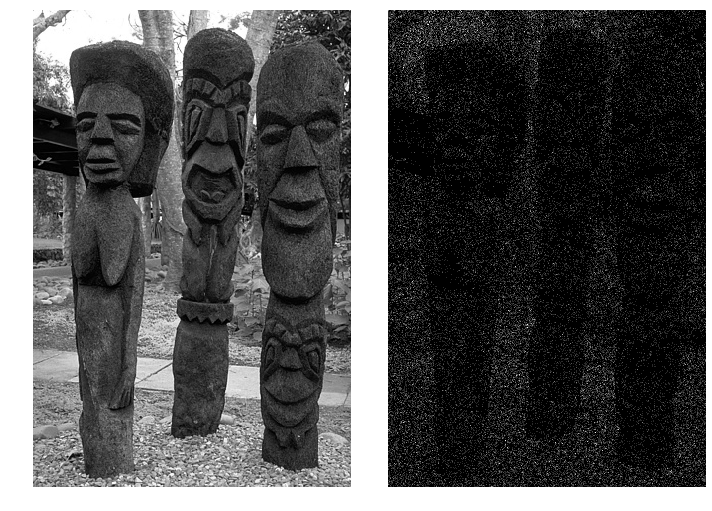

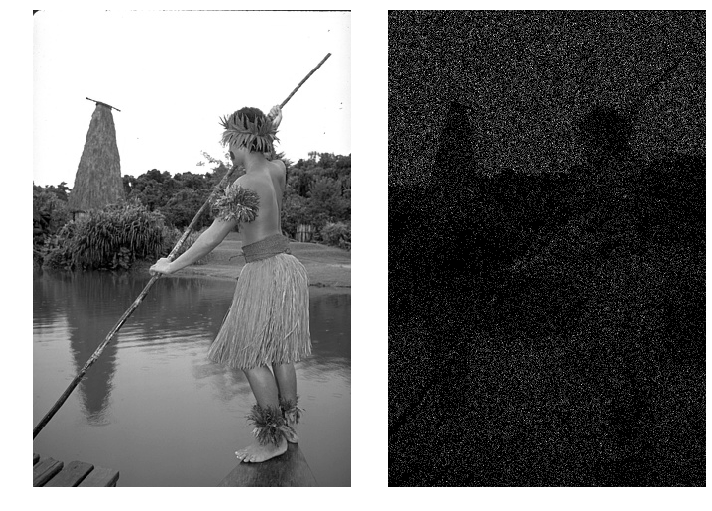

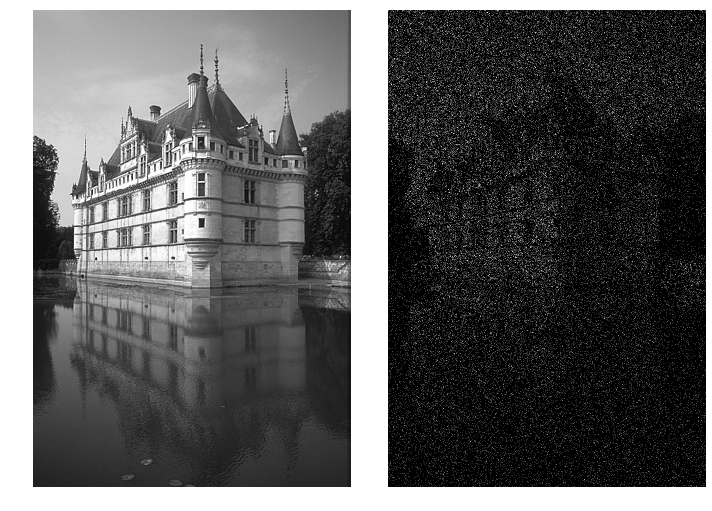

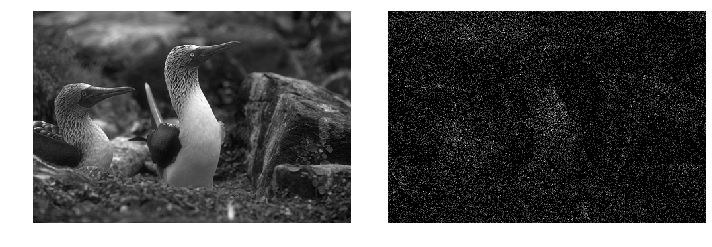

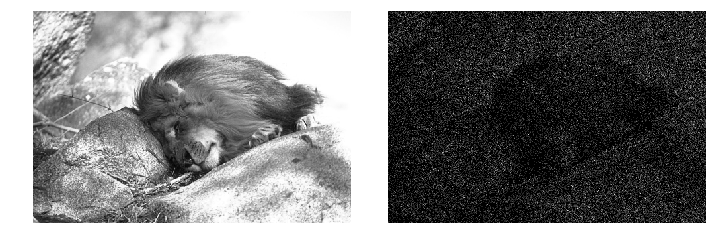

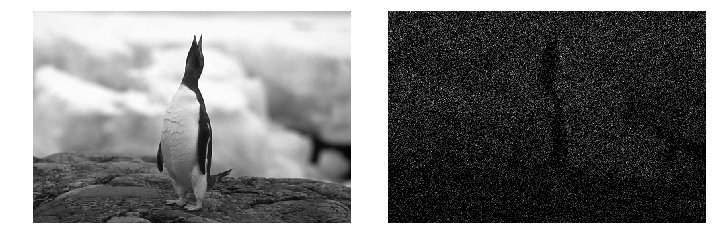

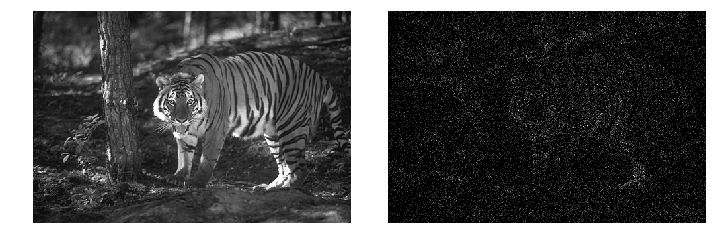

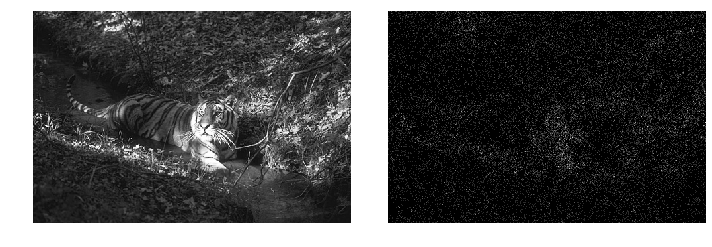

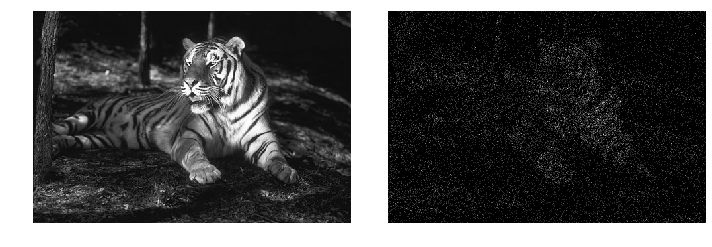

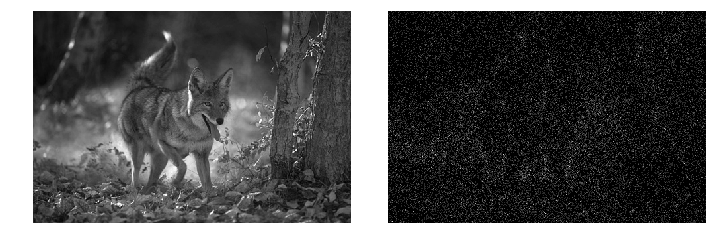

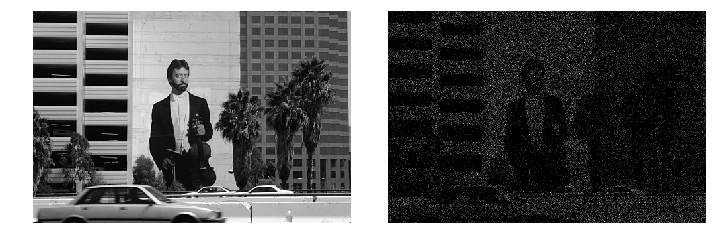

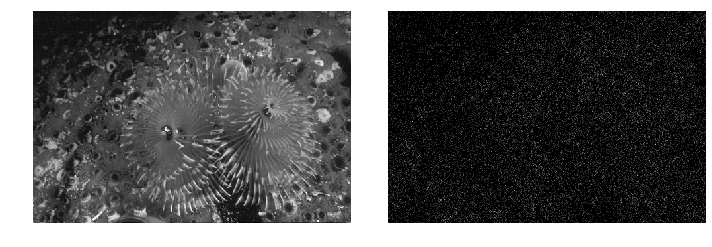

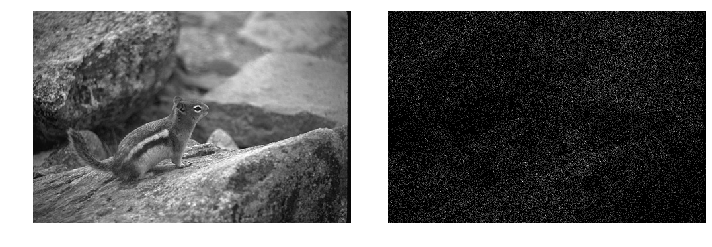

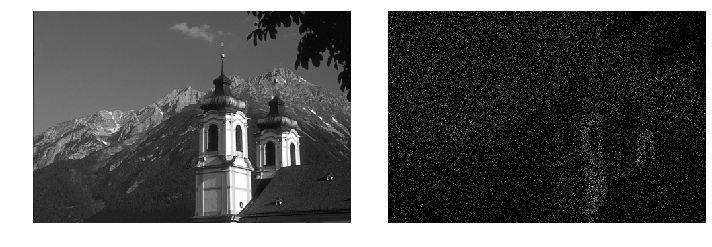

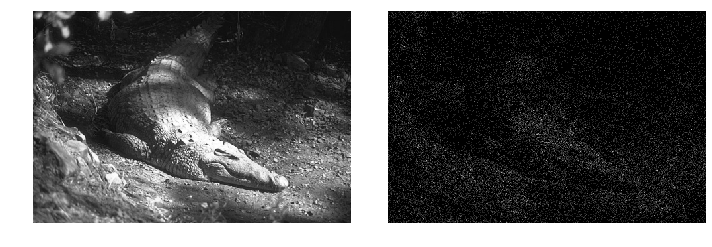

In [22]:
path2folder = './DATASETS/BSDS500/BSDS500_validation_PEAK_1/val/'
names = sorted([name[len(path2folder)+3:-4] for name in glob(path2folder+'gt/*.pth')])
for name in names[:15]:
    clear = th.load(path2folder+'gt/'+name+'.pth')[0]
    noisy = th.load(path2folder+'noisy/'+name+'.pth')[0]
    clear.unsqueeze_(0)
    noisy.unsqueeze_(0)
    show([clear, noisy])
    

In [20]:
val_path = './DATASETS/BSDS500/BSDS500_validation_PEAK_1/val/'

maxval = 1

np.random.seed(1)
for folder_type in ['val']: 
    
    list_of_pairs = pairs[folder_type]
    
    num_crops = 1
    
    for cur_crop_ind in range(num_crops):
        cur_crop_ind = cur_crop_ind + 1
        for i, pair in enumerate(tqdm(list_of_pairs)):
            path, name = pair['path'], pair['name']
            gt = imread(path).astype(np.float32)
            gt = (gt[...,0] + gt[...,1] + gt[...,2])/3
            gt[gt < 1] = 1
            gt /= 255
            
            gt, noisy = get_poisson_pair_by_maxval(gt, maxval)
            
            gt.unsqueeze_(0)
            noisy.unsqueeze_(0)

            th.save(gt, val_path+'gt/'+name+'_{}_maxval=1dot0.pth'\
                    .format(cur_crop_ind))
            th.save(noisy, val_path+'noisy/'+name+'_{}_maxval=1dot0.pth'\
                    .format(cur_crop_ind))
        

100%|██████████| 100/100 [00:02<00:00, 39.15it/s]
